In this notebook we go through several regression techniques and explore the difference between regression metrics.

In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

First, we look at a simple regression model that has only one independent variable.

In [62]:
df = pd.read_csv("../data/Salary.csv")

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


In [64]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


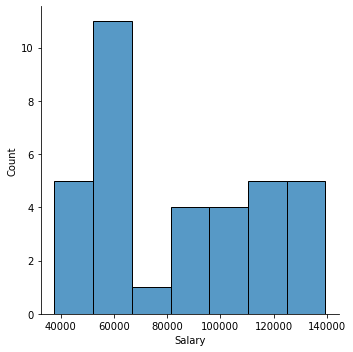

In [65]:
# Check the distribution of the target variable
sns.displot(x="Salary", data=df)

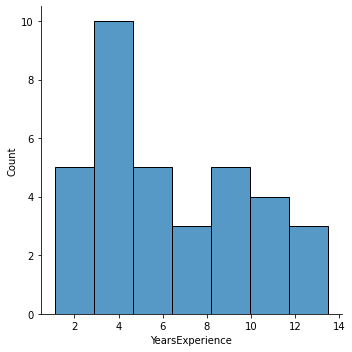

In [66]:
# Check the distribution of the YearsExperience variable
sns.displot(x="YearsExperience", data=df)

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

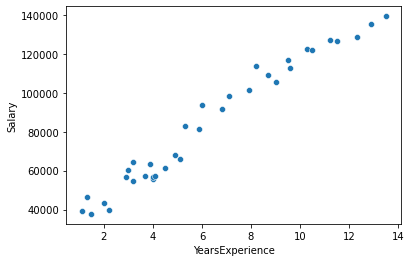

In [67]:
# Check the relationship between the two variables
sns.scatterplot(x="YearsExperience", y="Salary", data=df)

We can clearly see that there exists a linear relationship between the dependent and independent variable. Hence, it shouldn't be so hard to find a model that fits the data well.

In [68]:
X = np.array(df["YearsExperience"]).reshape(-1, 1)
y = df["Salary"]

In [69]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.7, random_state=42)

In [70]:
lr = LinearRegression()

In [71]:
lr.fit(X_train, y_train)

LinearRegression()

In [72]:
y_pred_train = lr.predict(X_train)
y_pred_valid = lr.predict(X_valid)

In [73]:
# Train metrics
print("MAE: ", mean_absolute_error(y_train, y_pred_train))
print("MSE:", mean_squared_error(y_train, y_pred_train))
print("RMSE:", mean_squared_error(y_train, y_pred_train, squared=False))
print("R-2: ", r2_score(y_train, y_pred_train))

MAE:  4351.8158991189675
MSE: 29076272.883777145
RMSE: 5392.241916288358
R-2:  0.9755630578296774


In [74]:
# Test metrics
print("MAE: ", mean_absolute_error(y_valid, y_pred_valid))
print("MSE:", mean_squared_error(y_valid, y_pred_valid))
print("RMSE:", mean_squared_error(y_valid, y_pred_valid, squared=False))
print("R-2: ", r2_score(y_valid, y_pred_valid))

MAE:  6513.641570145157
MSE: 49647591.15111792
RMSE: 7046.1046792620045
R-2:  0.9171426108885095


Text(0, 0.5, 'Salary')

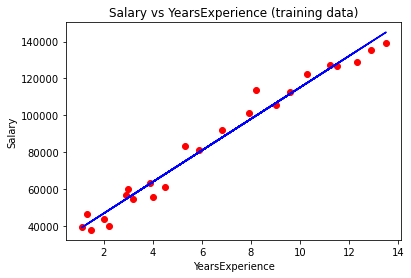

In [75]:
# Visualize the train data
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, y_pred_train, color='blue')
plt.title("Salary vs YearsExperience (training data)")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")

Text(0, 0.5, 'Salary')

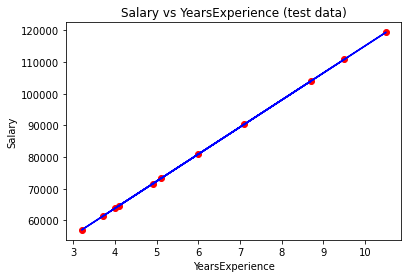

In [76]:
# Visualize the test data
plt.scatter(X_valid, y_pred_valid, color='red')
plt.plot(X_valid, y_pred_valid, color='blue')
plt.title("Salary vs YearsExperience (test data)")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")